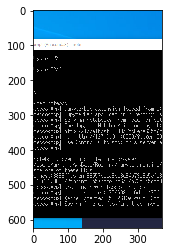

In [6]:
#현재 사용중인 화면 캡쳐하기
import numpy
from PIL import ImageGrab
import cv2
 
imgGrab = ImageGrab.grab(bbox=(800, 100, 1170, 724))
 
cv_img = cv2.cvtColor(numpy.array(imgGrab), cv2.COLOR_RGB2BGR)
 
cv2.imshow('image',cv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(cv_img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img2)
plt.show()